In [22]:
def frequency detection():
    import sys
    import numpy as np
    from aubio import source, pitch
    import amfm_decompy.pYAAPT as pYAAPT
    import amfm_decompy.basic_tools as basic
    import matplotlib.pyplot as plt
    # load audio
    signal = basic.SignalObj('outputs_test')
    pitchY = pYAAPT.yaapt(signal,frame_length = 40,tda_frame_length=40, f0_min = 75, f0_max = 600)
    downsample = 1
    samplerate = 0
    win_s = 1764 // downsample # fft size
    hop_s = 441 // downsample # hop size
    s = source(filename,samplerate, hop_s)
    samplerate = s.samplerate
    tolerance = 0.8
    pitch_o = pitch("yin", win_s, hop_s, samplerate)
    pitch_o.set_unit("midi")
    pitch_o.set_tolerance(tolerance)

    pitchesYIN = []
    confidences = []

    total_frames = 0
    while True:
        samples, read = s()
        pitch = pitch_o(samples)[0]
        pitch = int(round(pitch))
        confidence = pitch_o.get_confidence()
        pitchesYIN += [pitch]
        confidences += [confidence]
        total_frames += read
        if read < hop_s: break
        
# load PRAAT pitches
    praat = np.genfromtxt('/home/eva/Documents/papers/habr/PraatPitch.txt', filling_values = 0)
    praat = praat[:,1]

# plot       
    fig, (ax1,ax2,ax3) = plt.subplots(3,1,sharex = True, sharey = True, figsize=(12, 8))
    ax1.plot(np.asarray(pitchesYIN), label='YIN', color='green')
    ax1.legend(loc="upper right")
    ax2.plot(pitchY.samp_values, label='YAAPT', color='blue')
    ax2.legend(loc="upper right")
    ax3.plot(praat, label='Praat', color='red')
    ax3.legend(loc="upper right")
    plt.show()
    https://www.pvsm.ru/python/285345

SyntaxError: invalid syntax (<ipython-input-22-9926d9965197>, line 1)

19.8%


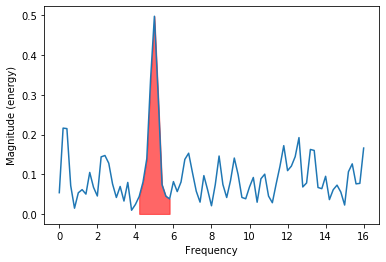

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import auc
np.random.seed(0)

# Sine sample with a frequency of 5hz and add some noise
sr = 32  # sampling rate
y = np.linspace(0, 5 * 2*np.pi, sr)
y = np.tile(np.sin(y), 5)
y += np.random.normal(0, 1, y.shape)
t = np.arange(len(y)) / float(sr)

# Generate frquency spectrum
spectrum, freqs, _ = plt.magnitude_spectrum(y, sr)

# Calculate percentage for a frequency range 
lower_frq, upper_frq = 4, 6
ind_band = np.where((freqs > lower_frq) & (freqs < upper_frq))
plt.fill_between(freqs[ind_band], spectrum[ind_band], color='red', alpha=0.6)
frq_band_perc = auc(freqs[ind_band], spectrum[ind_band]) / auc(freqs, spectrum)
print('{:.1%}'.format(frq_band_perc))
# 19.8%

In [6]:
# Read in a WAV and find the freq's
import pyaudio
import wave
import numpy as np

chunk = 2048

# open up a wave
wf = wave.open('test-tones/440hz.wav', 'rb')
swidth = wf.getsampwidth()
RATE = wf.getframerate()
# use a Blackman window
window = np.blackman(chunk)
# open stream
p = pyaudio.PyAudio()
stream = p.open(format =
                p.get_format_from_width(wf.getsampwidth()),
                channels = wf.getnchannels(),
                rate = RATE,
                output = True)

# read some data
data = wf.readframes(chunk)
# play stream and find the frequency of each chunk
while len(data) == chunk*swidth:
    # write data out to the audio stream
    stream.write(data)
    # unpack the data and times by the hamming window
    indata = np.array(wave.struct.unpack("%dh"%(len(data)/swidth),\
                                         data))*window
    # Take the fft and square each value
    fftData=abs(np.fft.rfft(indata))**2
    # find the maximum
    which = fftData[1:].argmax() + 1
    # use quadratic interpolation around the max
    if which != len(fftData)-1:
        y0,y1,y2 = np.log(fftData[which-1:which+2:])
        x1 = (y2 - y0) * .5 / (2 * y1 - y2 - y0)
        # find the frequency and output it
        thefreq = (which+x1)*RATE/chunk
        print "The freq is %f Hz." % (thefreq)
    else:
        thefreq = which*RATE/chunk
        print "The freq is %f Hz." % (thefreq)
    # read some more data
    data = wf.readframes(chunk)
if data:
    stream.write(data)
stream.close()
p.terminate()


SyntaxError: invalid syntax (<ipython-input-6-dc5b883f7db7>, line 41)

In [2]:
import librosa.display
import matplotlib.pyplot as plt
import numpy
x1, sr = librosa.load('noises/mousetrap1.wav')
cent_n= librosa.feature.spectral_centroid(x1, sr=sr)[0]
cent_n1=numpy.where(cent_n>0)
cent_n 
numpy.delete(a, obj, axis=None)

/zfs/hybrilit.jinr.ru/user/r/rybakina/.local/lib/python3.7/site-packages/librosa/core/audio.py:162: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


FileNotFoundError: [Errno 2] No such file or directory: 'noises/mousetrap1.wav'